#### MANGOES IMAGE CLASSIFICATION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [11]:
# Importing necessary libraries
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Define the input shape of our images
input_shape = (224, 224, 3)
# Define the data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Dataset/Classification_dataset",
target_size=input_shape[:2],
batch_size=32,
class_mode="categorical",
subset='training')


Found 1280 images belonging to 8 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
"/content/drive/MyDrive/Dataset/Classification_dataset",
target_size=input_shape[:2],
batch_size=32,
class_mode='categorical',
subset='validation')


Found 320 images belonging to 8 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Dataset/Classification_dataset",
target_size=input_shape[:2],
batch_size=32,
class_mode='categorical')


Found 1600 images belonging to 8 classes.


### Model Building

In [ ]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input



In [ ]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
# Freeze the weights of the pre-trained Layers
for layer in base_model.layers:
    layer.trainable = False
# Add our own classification Layers on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
# Print the model summary
model.summary ()


58889256/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 21139528 (80.64 MB)
Trainable params: 6424840 (24.51 MB)
Non-trainable params: 14714688 (56.13 MB)
__________

In [10]:
# Compile the model

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

# Train the model

history = model.fit(
train_generator,
steps_per_epoch=train_generator.samples//train_generator.batch_size,
epochs=10,
validation_data=val_generator,
validation_steps=val_generator.samples//val_generator.batch_size)


Epoch 1/10
40/40 [==============================] - 892s 22s/step - loss: 2.5152 - accuracy: 0.3734 - val_loss: 1.2707 - val_accuracy: 0.6531
Epoch 2/10
40/40 [==============================] - 867s 22s/step - loss: 1.0758 - accuracy: 0.6289 - val_loss: 0.9738 - val_accuracy: 0.7500
Epoch 3/10
40/40 [==============================] - 875s 22s/step - loss: 0.8857 - accuracy: 0.6797 - val_loss: 0.8168 - val_accuracy: 0.7500
Epoch 4/10
40/40 [==============================] - 862s 22s/step - loss: 0.7019 - accuracy: 0.7500 - val_loss: 0.7146 - val_accuracy: 0.7906
Epoch 5/10
40/40 [==============================] - 862s 22s/step - loss: 0.6411 - accuracy: 0.7672 - val_loss: 0.6614 - val_accuracy: 0.8125
Epoch 6/10
40/40 [==============================] - 863s 22s/step - loss: 0.5446 - accuracy: 0.7961 - val_loss: 0.5936 - val_accuracy: 0.8188
Epoch 7/10
40/40 [==============================] - 862s 22s/step - loss: 0.4974 - accuracy: 0.8289 - val_loss: 0.6343 - val_accuracy: 0.8031
Epoch 

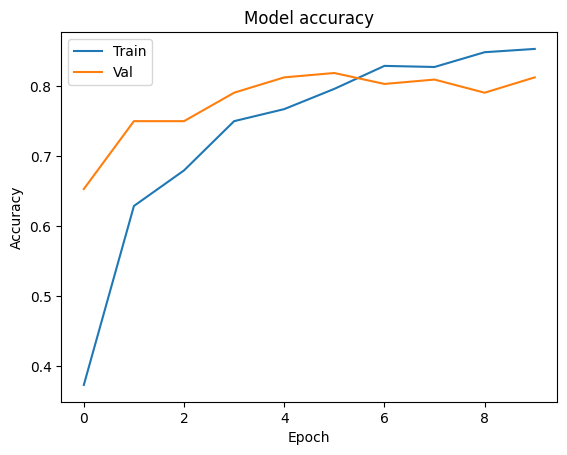

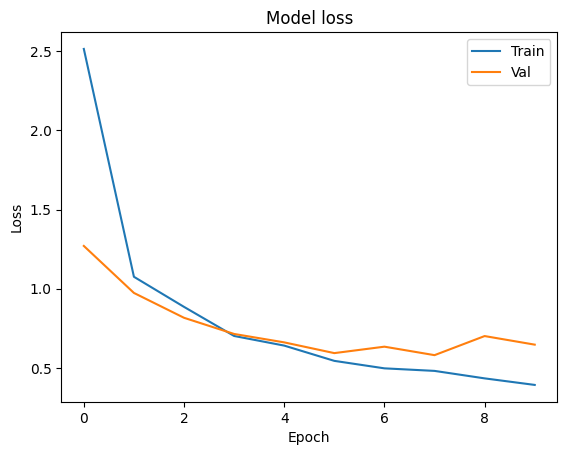

In [12]:
# Plot the training and validation accuracy curves
plt.plot(history.history[ 'accuracy' ])
plt.plot(history.history[ 'val_accuracy'])
plt.title( 'Model accuracy')
plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Val'], loc="upper left")
plt.show()

# Plot the training and validation Loss curves
plt.plot(history.history['loss'])
plt.plot(history.history[ 'val_loss'])
plt.title( "Model loss")

plt.ylabel('Loss')

plt.xlabel('Epoch')

plt.legend(['Train', 'Val'], loc="upper right")
plt.show()


In [17]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_generator, steps=val_generator.samples//val_generator.batch_size)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

10/10 [==============================] - 166s 16s/step - loss: 0.6471 - accuracy: 0.8125
Validation loss: 0.647093653678894
Validation accuracy: 0.8125


In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples//test_generator.batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

50/50 [==============================] - 852s 17s/step - loss: 0.1733 - accuracy: 0.9613
Test loss: 0.17328833043575287
Test accuracy: 0.9612500071525574


1/1 [==============================] - 0s 455ms/step


Predicted class: Fajri


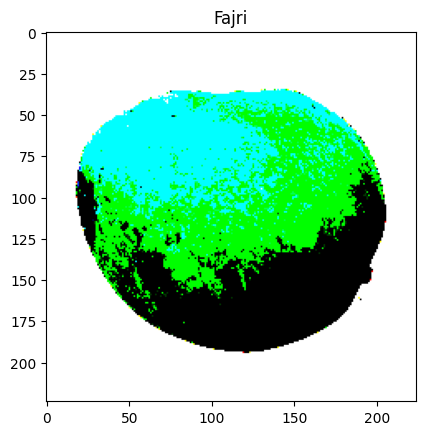

In [18]:
img_height, img_width = 224, 224
# Load and preprocess the test image
test_image = image.load_img('/content/drive/MyDrive/Dataset/Classification_dataset/Fajri/IMG_20210705_104139.jpg', target_size=(img_height, img_width))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

# Make predictions on the test image
predictions = model.predict(test_image)
predicted_class_index = np.argmax(predictions[0])
class_names = ['Anwar Ratool', 'Chaunsa(black)','Chaunsa(summer bahisht)', 'Chaunsa(white)', 'Dosehri', 'Fajri', 'Langra', 'Sindhri']
predicted_class_name = class_names[predicted_class_index]
print('Predicted class:', predicted_class_name)

# Display the image
plt.imshow(test_image[0])
plt.title(predicted_class_name)
plt.show()

1/1 [==============================] - 1s 603ms/step
Predicted class: Fajri


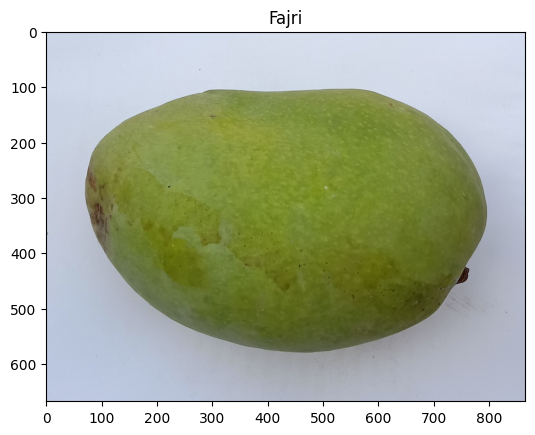

In [14]:
img_height, img_width = 224, 224

# Load and preprocess the test image
test_image = image.load_img('/content/drive/MyDrive/Dataset/Classification_dataset/Fajri/IMG_20210705_104139.jpg', target_size=(img_height, img_width))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

# Make predictions on the test image
predictions = model.predict(test_image)
predicted_class_index = np.argmax(predictions[0])
class_names = ['Anwar Ratool', 'Chaunsa(black)','Chaunsa(summer bahisht)', 'Chaunsa(white)', 'Dosehri', 'Fajri', 'Langra', 'Sindhri']
predicted_class_name = class_names[predicted_class_index]
print('Predicted class:', predicted_class_name)

# Display the test image
plt.imshow(image.load_img('/content/drive/MyDrive/Dataset/Classification_dataset/Fajri/IMG_20210705_104139.jpg'))
plt.title(predicted_class_name)
plt.show()

In [23]:
# Save the final model
model.save('mango_classification_model.h5')


In [ ]:
# Load the saved model

from tensorflow.keras.models import load_model

model = load_model("mango_classification_model.h5")